In [1]:
import sys
sys.path.append('..')

from nn import Model
from nn.layers import Conv2D, MaxPooling2D, Flatten, Dense
from nn.optimizers import Adam, SGD
from nn.initializers import GlorotNormal
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

np.set_printoptions(precision=3)
np.random.seed(1)

In [2]:
def plot_metrics(model):
    metrics = {'acc': 'Accuracy', 'loss': 'Loss'}
    
    figure, subplots = plt.subplots(1, 2)
    figure.set_size_inches(13, 4)

    for subplot, (metric, title) in zip(subplots, metrics.items()):
        subplot.plot(model.scores[metric])
        subplot.plot(model.scores['val_' + metric])
        subplot.set_title(title)
        subplot.legend(['train', 'validation'])
    plt.show()

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], -1))
X_train = X_train / 255

X_test = X_test.reshape((X_test.shape[0], -1))

In [4]:
regular = Model()
regular.add(Dense(10, activation='sigmoid', input_shape=(784,), weight_initializer=GlorotNormal()))
regular.add(Dense(10, activation='softmax'))
regular.compile(optimizer=Adam())
regular.fit(X_train, y_train, epochs=20, batch_size=32, validation_fraction=0.2, shuffle=False)

In [5]:
shuffle = Model()
shuffle.add(Dense(10, activation='sigmoid', input_shape=(784,), weight_initializer=GlorotNormal()))
shuffle.add(Dense(10, activation='softmax'))
shuffle.compile(optimizer=Adam())
shuffle.fit(X_train, y_train, epochs=20, batch_size=32, validation_fraction=0.2, shuffle=True)

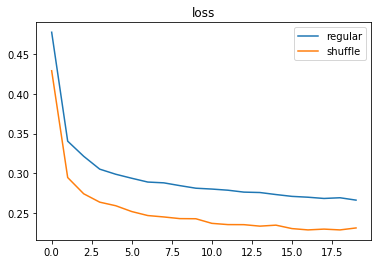

In [6]:
plt.plot(regular.scores['loss'])
plt.plot(shuffle.scores['loss'])
plt.legend(['regular', 'shuffle'])
plt.title('loss')
plt.show()

In [7]:
_, train_scores = regular.evaluate(X_train, y_train)
_, test_scores = regular.evaluate(X_test, y_test)
print('Train/Test accuracy: %0.3f/%0.3f' % (train_scores['acc'], test_scores['acc']))

Train/Test accuracy: 0.919/0.883


../nn/activations.py:42: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [8]:
_, train_scores = shuffle.evaluate(X_train, y_train)
_, test_scores = shuffle.evaluate(X_test, y_test)
print('Train/Test accuracy: %0.3f/%0.3f' % (train_scores['acc'], test_scores['acc']))

Train/Test accuracy: 0.940/0.898
